# Wrong prediction

In [19]:
from tensorflow.keras.optimizers import RMSprop
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score, roc_curve, auc

In [2]:
# load in the validation image data

valid_data_dir = '/home/eyan/Desktop/bug_bite/Resources/images/testing'

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255.)

test_generator = test_datagen.flow_from_directory(
    valid_data_dir, 
    target_size=(150, 150),
    batch_size=1,shuffle=False,
    class_mode='categorical') 

Found 231 images belonging to 8 classes.


In [20]:
# load in model
model_dir = '/home/eyan/Desktop/bug_bite_old/models/8_class_mixed7_79p.h5'

model = tf.keras.models.load_model(model_dir)

In [4]:
# getting the names of the files and the # of samples
imagenames = test_generator.filenames

nb_samples = len(imagenames)

print(nb_samples)

231


In [5]:
# making predictions

predict = model.predict(test_generator, steps=nb_samples)

In [6]:
from sklearn.metrics import confusion_matrix
import numpy as np

# to find the largest prob from the softmax output
y_pred = np.argmax(predict,axis=1)
## y_pred = np.rint(predict)

# get the real calss name
y_true = test_generator.classes

# print out the confusion matrix
print(confusion_matrix(y_true, y_pred))

[[27  0  0  0  1  0  0  0]
 [ 1 26  4  3  0  1  0  1]
 [ 0  4 23  1  1  0  3  2]
 [ 0  1  0 18  1  0  0  1]
 [ 0  0  0  1 19  0  0  1]
 [ 0  2  1  0  0 28  0  0]
 [ 2  0  0  1  1  0 21  3]
 [ 1  1  1  0  0  1  2 26]]


In [7]:
f1 = f1_score(y_true, y_pred, labels=[0,1,2,3,4,5,6,7], average='weighted')
print('f1 score: %.3f' %f1)
print(f1)

precision = precision_score(y_true, y_pred, labels=[0,1,2,3,4,5,6,7], average='weighted')
print('Precision: %.3f' %precision)
print(precision)

recall = recall_score(y_true, y_pred, labels=[0,1,2,3,4,5,6,7],average='weighted')
print('Recall: %.3f' % recall)
print(recall)

accuracy = recall_score(y_true, y_pred, labels=[0,1,2,3,4,5,6,7],average='weighted')
print('Accuracy: %.3f' % accuracy)
print(accuracy)

f1 score: 0.812
0.8120374529524979
Precision: 0.814
0.8138491690530187
Recall: 0.814
0.8138528138528138
Accuracy: 0.814
0.8138528138528138


In [8]:
CLASS_NAMES = ['Ants', 'Bed Bugs', 'Chiggers', 'Fleas','Mosquitos', 'No Bites', 'Spiders',
       'Ticks']

In [9]:
short = ['bed_bugs','chiggers','fleas','mosquitos','no_bites','ticks']

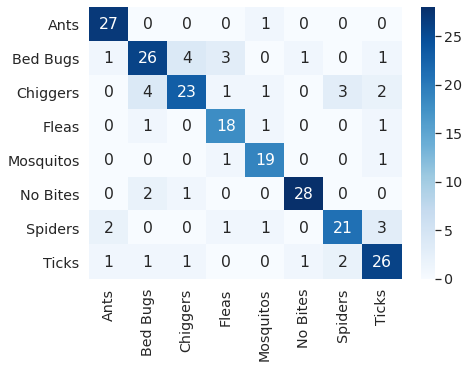

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))

confusion_mtx = confusion_matrix(y_true, y_pred) 

x_axis_labels = CLASS_NAMES# labels for x-axis
y_axis_labels = CLASS_NAMES # labels for y-axis
sns.set(font_scale=1.3)
# use sns to show heatmap with confusion matrix
sns.heatmap(confusion_mtx, xticklabels=x_axis_labels, yticklabels=y_axis_labels, annot=True, cmap='Blues')
#plt.ylabel("True")
#plt.xlabel("Predicted")
#sns.heatmap(confusion_mtx, annot=True);

In [11]:
# no of misclassifications
errors = np.where(y_pred != y_true)[0]
# the name of the files where the class. is wrong
wrong_file = {}
for i in errors:
    wrong_file[i]=imagenames[i]
# print how many wrong
len(wrong_file)

43

In [12]:
# showing a batch in 5x5 grid
def show_batch(image_batch, label_batch):
  plt.figure(figsize=(10,10))
  for n in range(49):
      ax = plt.subplot(7,7,n+1)
      plt.imshow(image_batch[n])
      plt.title(CLASS_NAMES[label_batch[n]==1][0].title())
      plt.axis('off')

Using TensorFlow backend.


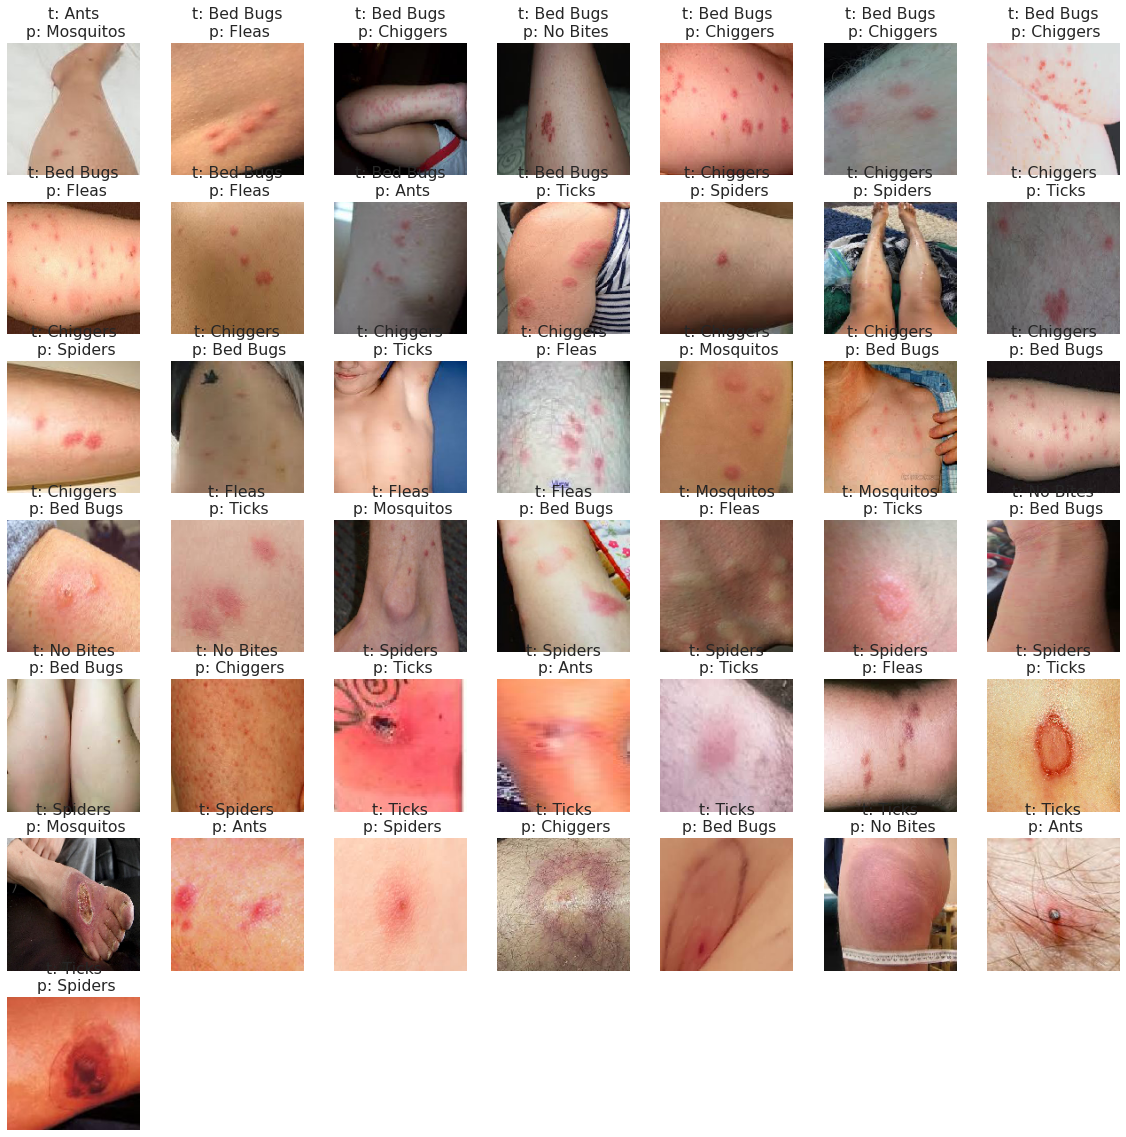

In [13]:
from keras.preprocessing import image
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import os

# show a 7x 7 matrix of images from the batch
plt.figure(figsize=(20,20))
n=0

wrong_predict = []
for i, name in wrong_file.items():
    img_path = os.path.join(valid_data_dir,name)
    img = image.load_img(img_path, target_size=(150, 150))
    img_tensor = image.img_to_array(img)
    img_tensor = np.expand_dims(img_tensor, axis=0)
    img_tensor /= 255.
    ax = plt.subplot(7,7,n+1)
    n+=1
    plt.imshow(img_tensor[0])
    plt.title("t: "+str(CLASS_NAMES[y_true[i]])+"\n p: "+str(CLASS_NAMES[y_pred[i]]))
    plt.axis('off')
    wrong_predict.append(predict[i])
    
plt.show()

In [14]:
# for the image that predicted the wrong result, are they very sure of the predictions?

# make empty arrays to hold the best prob and the 2nd best prob
prob_wrong_pred = []
sec_wrong_pred = []
for p in wrong_predict:
    # prob of the best
    a = np.max(p)
    # the prob of the second best
    b = np.partition(p, -2)[-2]
    # print(a,"  ",b)
    # print('\n')
    prob_wrong_pred.append(a)
    sec_wrong_pred.append(b)

In [15]:

# make empty arrays to hold the best prob and the 2nd best prob
prob = []
sec_prob = []
for p in predict:
    a = np.max(p)
    b = np.partition(p, -2)[-2]
    # print(a,"  ",b)
    # print('\n')
    prob.append(a)
    sec_prob.append(b)

In [16]:
print("average:")
print(np.average(prob))
print(np.average(sec_prob))
print()
print("median:")
print(np.median(prob))
print(np.median(sec_prob))


average:
0.9703725
0.027934197

median:
1.0
1.907776e-09


In [17]:
print("average:")
print(np.average(prob_wrong_pred))
print(np.average(sec_wrong_pred))
print()
print("median:")
print(np.median(prob_wrong_pred))
print(np.median(sec_wrong_pred))

# model is overtrained / overfitted - being too certain about its prediction even when it is WRONG

average:
0.918871
0.07783079

median:
0.99620795
0.003792052


# Looking at a separate test set for skin of color

In [93]:
# load in the validation image data

soc_data_dir = '/home/eyan/Desktop/bug_bite/Resources/images/skin_of_color_testing'

soc_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255.)

soc_generator = test_datagen.flow_from_directory(
    soc_data_dir, 
    target_size=(150, 150),
    batch_size=1,shuffle=False,
    class_mode='categorical') 

Found 24 images belonging to 8 classes.


In [94]:
# getting the names of the files and the # of samples
imagenames = soc_generator.filenames

nb_samples = len(imagenames)

# print(nb_samples)

24


In [95]:
# making predictions

predict = model.predict(soc_generator, steps=nb_samples)

In [97]:
# to find the largest prob from the softmax output
y_pred = np.argmax(predict,axis=1)
## y_pred = np.rint(predict)

# get the real calss name
y_true = soc_generator.classes

# print out the confusion matrix
print(confusion_matrix(y_true, y_pred))

[[0 0 9 1 3 0]
 [1 0 2 0 0 0]
 [0 1 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 4 0]
 [0 0 0 2 0 1]]


In [99]:
f1 = f1_score(y_true, y_pred, labels=[0,1,2,3,4,5,6,7], average='weighted')
print('f1 score: %.3f' %f1)

precision = precision_score(y_true, y_pred, labels=[0,1,2,3,4,5,6,7], average='weighted')
print('Precision: %.3f' %precision)

recall = recall_score(y_true, y_pred, labels=[0,1,2,3,4,5,6,7],average='weighted')
print('Recall: %.3f' % recall)

accuracy = recall_score(y_true, y_pred, labels=[0,1,2,3,4,5,6,7],average='weighted')
print('Accuracy: %.3f' % accuracy)

f1 score: 0.184
Precision: 0.220
Recall: 0.208
Accuracy: 0.208


In [100]:
y_true

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 3, 5, 5, 5, 5, 7,
       7, 7], dtype=int32)

In [101]:
y_pred

array([3, 3, 3, 3, 3, 3, 3, 4, 5, 3, 5, 5, 3, 3, 1, 3, 2, 5, 5, 5, 5, 7,
       4, 4])

In [102]:
CLASS_NAMES

['Ants',
 'Bed Bugs',
 'Chiggers',
 'Fleas',
 'Mosquitos',
 'No Bites',
 'Spiders',
 'Ticks']

In [103]:
short = ['Bed Bugs', 'Chiggers','Fleas','Mosquitos','No Bites','Ticks']

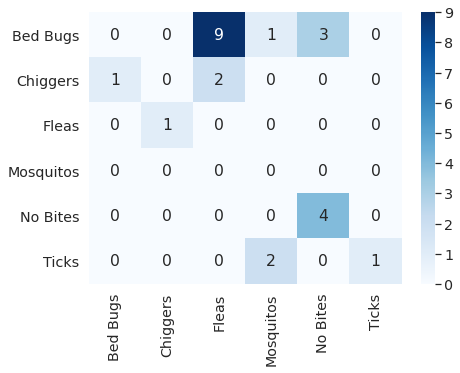

In [104]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))

confusion_mtx = confusion_matrix(y_true, y_pred) 

x_axis_labels = short# labels for x-axis
y_axis_labels = short # labels for y-axis
sns.set(font_scale=1.3)
# use sns to show heatmap with confusion matrix
sns.heatmap(confusion_mtx, xticklabels=x_axis_labels, yticklabels=y_axis_labels, annot=True, cmap='Blues')
#plt.ylabel("True")
#plt.xlabel("Predicted")
#sns.heatmap(confusion_mtx, annot=True);

In [69]:
# no of misclassifications
errors = np.where(y_pred != y_true)[0]
# the name of the files where the class. is wrong
wrong_file = {}
for i in errors:
    wrong_file[i]=imagenames[i]
# print how many wrong
len(wrong_file)

In [71]:
# showing a batch in 5x5 grid
def show_batch(image_batch, label_batch):
  plt.figure(figsize=(10,10))
  for n in range(49):
      ax = plt.subplot(7,7,n+1)
      plt.imshow(image_batch[n])
      plt.title(CLASS_NAMES[label_batch[n]==1][0].title())
      plt.axis('off')

Using TensorFlow backend.


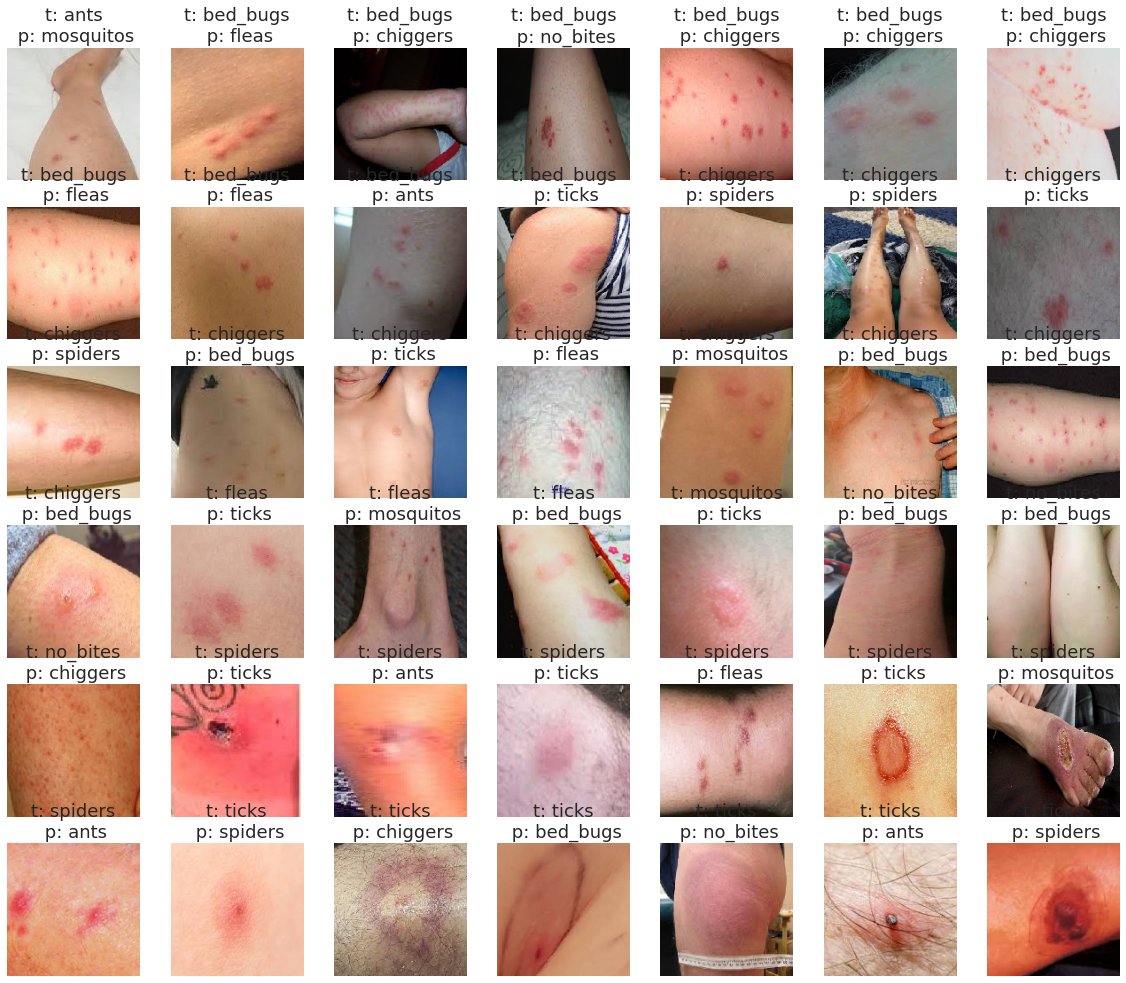

In [73]:
from keras.preprocessing import image
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import os

# show a 7x 7 matrix of images from the batch
plt.figure(figsize=(20,20))
n=0

wrong_predict = []
for i, name in wrong_file.items():
    img_path = os.path.join(valid_data_dir,name)
    img = image.load_img(img_path, target_size=(150, 150))
    img_tensor = image.img_to_array(img)
    img_tensor = np.expand_dims(img_tensor, axis=0)
    img_tensor /= 255.
    ax = plt.subplot(7,7,n+1)
    n+=1
    plt.imshow(img_tensor[0])
    plt.title("t: "+str(CLASS_NAMES[y_true[i]])+"\n p: "+str(CLASS_NAMES[y_pred[i]]))
    plt.axis('off')
    wrong_predict.append(predict[i])
    
plt.show()

# Looking at individual images

In [1]:
import tensorflow as tf
import numpy as np

SIZE=150

model = tf.keras.models.load_model('/home/eyan/Desktop/bug_bite_old/models/8_class_mixed7_79p.h5')

CLASSES = ['ants','bed_bugs','chiggers','fleas','mosquitos','no_bites','spiders','ticks','unknown']


In [16]:
# if i input a random non-bug bite image : the model fails - it is being very sure that it is one of the classes and output a probability of 1

image_path = '/home/eyan/Desktop/bug_bite_old/misc_images/Screenshot from 2020-06-16 12-30-48.png'

In [17]:
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(SIZE, SIZE))
image = tf.keras.preprocessing.image.img_to_array(image)
image = tf.keras.applications.inception_v3.preprocess_input(image)
image = np.expand_dims(image, axis=0)

In [18]:
result = model.predict(image)
print(result)
if np.max(result) > 0.9:
    pred = np.argmax(result[0])
else:
    pred = 8
# output the name of the class
class_name = CLASSES[pred]

[[0. 0. 0. 0. 0. 0. 0. 1.]]
